# Movie Genre Data Analysis

## Introduction

We are going to focus highly on genres. I want to know everything about genres.

Here are some things I want to look at:

## Research Questions (Q):

1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revenue?
3. Which genres have high avg. popularity?
4. Which genres have the highest number of movies with a voting avg. >= 8?

## Research Hypotheses (H):

1. The best movies according to vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high revenue and profit.
4. Highly budgeted movies have a high popularity.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv(r'C:\Users\bende\Desktop\Pandas\imdb_movies.csv')
pd.set_option('display.max.columns', 22)
movies.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


# Data Cleaning

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Check for duplicates

In [6]:
# out the rows with duplicates
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [7]:
# removing duplicates
movies.drop_duplicates(inplace=True)

## Removing empty genres

In [8]:
movies.dropna(subset=['genres'], inplace=True)

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

## Creating movies profit field (revenue - budget)

In [10]:
movies['profit'] = movies['revenue'] - movies['budget'] 

In [11]:
movies['profit'].head()

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit, dtype: int64

## Removing useless columns

In [12]:
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit']]

In [13]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


## Splitting genres so each genre of each movie would be in a seperate row

In [15]:
from pandas import Series, DataFrame
# Applying the Series constructor to expand the list into separate columns,
# effectively transforming each genre into its own column in the DataFrame.
genre_expanded = movies_genre['genres'].str.split('|', expand=True)
genre_expanded
#movies_genre = movies_genre.join(genre_expanded)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10861,Documentary,None,None,None,None
10862,Action,Adventure,Drama,None,None
10863,Mystery,Comedy,None,None,None
10864,Action,Comedy,None,None,None


In [17]:
# Stacking the expanded DataFrame to transform it from wide format to long format.
# This moves all genre values into a single column, keeping index relationships.
genre_expanded = movies_genre['genres'].str.split('|', expand=True).stack()
genre_expanded

0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [19]:
# NOW WE GET RID OF AN INNER INDEX LEVEL, SO EACH GENRES COULD BELONG TO THEIR OWN MOVIES INDEX
genre_expanded = movies_genre['genres'].str.split('|', expand=True).stack()
genre_expanded.index = genre_expanded.index.droplevel(-1)
genre_expanded

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Length: 26955, dtype: object

In [20]:
# MAKING A NAME TO OUR SERIES
genre_expanded.name = 'genres_split'
# DELETING ALL GENRES OLD COLUMN
del movies_genre['genres']
# ADDING A COLUMN (OUR SERIES) TO DF 
movies_genre = movies_genre.join(genre_expanded)
movies_genre

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Comedy


# Research Questions:

## 1. Which genres are the most common (number of movies made)?

In [28]:
# creating a dataframe
genres_count = pd.DataFrame(movies_genre.groupby('genres_split')['original_title'].nunique()).sort_values(by='original_title', ascending=False)
genres_count

,original_title
genres_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


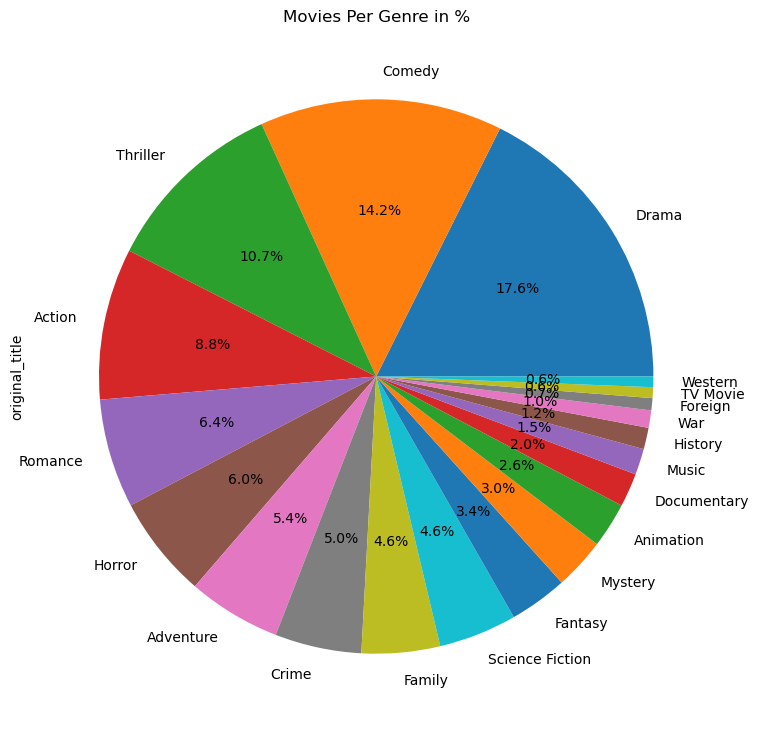

In [29]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (9,9))
plt.show()

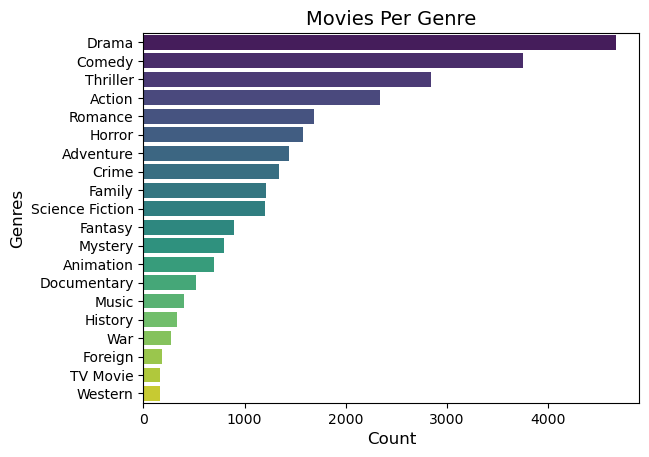

In [32]:
sns.barplot(
    x=genres_count['original_title'],
    y=genres_count.index, 
    hue=genres_count.index,
    palette="viridis"
)

plt.title('Movies Per Genre', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Display the plot
plt.show()


## 2. Which genres have high avg. budget and revenue?


## Average values table

In [37]:
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only=True)
# CHANGING THE DISPLAY OF FLOATING NUMBERS, SO THEY NOW NOT IN SCIENTIFIC FORMAT
pd.options.display.float_format = '{:.2f}'.format
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.93,27727820.33,72794732.00,104.92,392.99,5.79,45066911.67
Adventure,1.15,37543694.53,113137861.07,106.17,513.13,5.94,75594166.54
Animation,0.85,23159781.61,75256062.22,68.18,303.00,6.40,52096280.62
Comedy,0.59,13297915.62,37526242.07,96.75,176.44,5.91,24228326.45
Crime,0.74,17663801.12,42368661.65,106.92,278.81,6.12,24704860.52
Documentary,0.18,577149.15,2041106.99,102.65,35.11,6.91,1463957.85
Drama,0.59,11880717.77,29232255.73,110.48,182.54,6.17,17351537.95
Family,0.79,23359337.42,72433176.37,89.60,272.32,6.00,49073838.95
Fantasy,0.99,32612585.35,96313657.08,100.74,420.74,5.86,63701071.73


In [38]:
genres_avg.sort_values('budget', ascending=True, inplace = True)

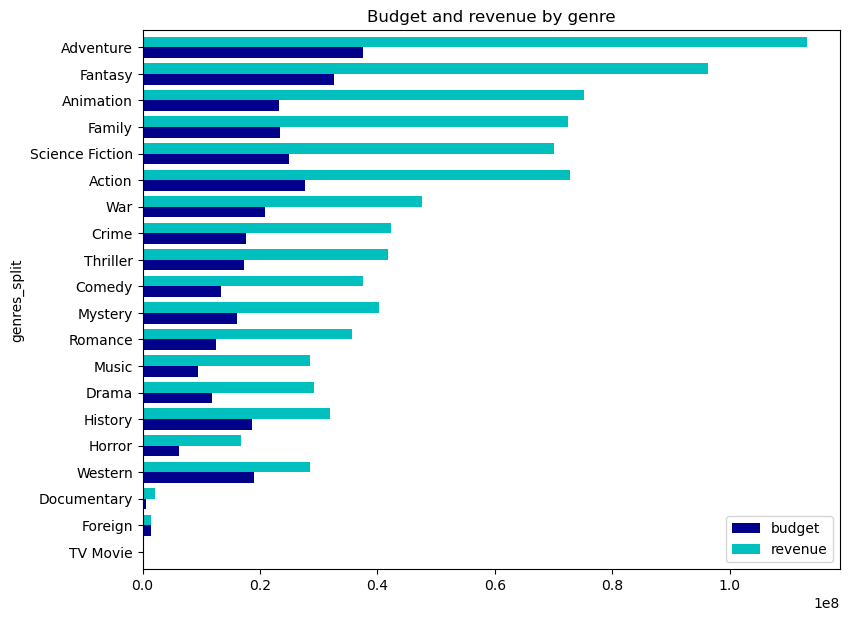

In [50]:
genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and revenue by genre', color=('darkblue','c'), width=0.8, figsize = (9,7))
plt.show()


## 2.5 Which genres have high avg. Profit?


In [63]:
genres_avg.sort_values('profit', ascending=False, inplace = True)
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Adventure,1.15,37543694.53,113137861.07,106.17,513.13,5.94,75594166.54
Fantasy,0.99,32612585.35,96313657.08,100.74,420.74,5.86,63701071.73
Animation,0.85,23159781.61,75256062.22,68.18,303.00,6.40,52096280.62
Family,0.79,23359337.42,72433176.37,89.60,272.32,6.00,49073838.95
Science Fiction,1.00,24972680.52,70140558.03,99.42,437.10,5.67,45167877.51
Action,0.93,27727820.33,72794732.00,104.92,392.99,5.79,45066911.67
War,0.73,20891886.10,47605183.30,127.63,270.73,6.30,26713297.20
Crime,0.74,17663801.12,42368661.65,106.92,278.81,6.12,24704860.52
Thriller,0.74,17207693.77,41728417.54,103.25,255.48,5.75,24520723.77


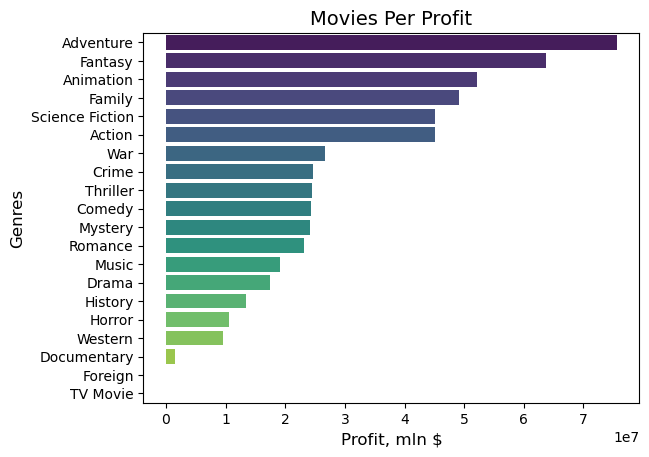

In [67]:

sns.barplot(
    x=genres_avg['profit'],
    y=genres_avg.index, 
    hue=genres_avg.index,
    palette="viridis"
)

plt.title('Movies Per Profit', fontsize=14)
plt.xlabel('Profit, mln $', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Display the plot
plt.show()

## 3. Which genres have high avg. popularity?


In [70]:
genres_avg.sort_values('popularity', ascending=False, inplace = True)

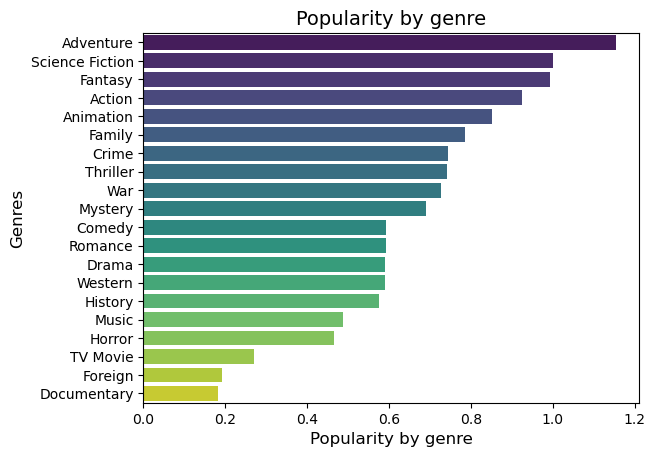

In [71]:

sns.barplot(
    x=genres_avg['popularity'],
    y=genres_avg.index, 
    hue=genres_avg.index,
    palette="viridis"
)

plt.title('Popularity by genre', fontsize=14)
plt.xlabel('Popularity by genre', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Display the plot
plt.show()

## 4. Which genres have highest number of movies with an voting avg. >=8?

In [67]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action


In [72]:
# FIRST LET'S CONSIDER ONLY MOVIES WHERE VOTE COUNT > 50 and add our condition
movies_genre[(movies_genre['vote_count']>=50) & (movies_genre['vote_average']>=8)]

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
9,6.33,175000000,853708609,Inside Out,94,6/9/15,3935,8.00,678708609,Comedy
9,6.33,175000000,853708609,Inside Out,94,6/9/15,3935,8.00,678708609,Animation
9,6.33,175000000,853708609,Inside Out,94,6/9/15,3935,8.00,678708609,Family
35,3.56,6000000,35401758,Room,117,10/16/15,1520,8.00,29401758,Drama
35,3.56,6000000,35401758,Room,117,10/16/15,1520,8.00,29401758,Thriller
...,...,...,...,...,...,...,...,...,...,...
10141,2.61,806948,32000000,Psycho,109,8/14/60,1180,8.00,31193052,Horror
10141,2.61,806948,32000000,Psycho,109,8/14/60,1180,8.00,31193052,Thriller
10222,2.38,22000000,321265768,Schindler's List,195,11/29/93,2632,8.10,299265768,Drama
10222,2.38,22000000,321265768,Schindler's List,195,11/29/93,2632,8.10,299265768,History


In [73]:
vote_fifty = movies_genre[(movies_genre['vote_count']>=50) & (movies_genre['vote_average']>=8)]

In [74]:
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split')['vote_average'].nunique()).sort_values(by='vote_average', ascending=True)
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


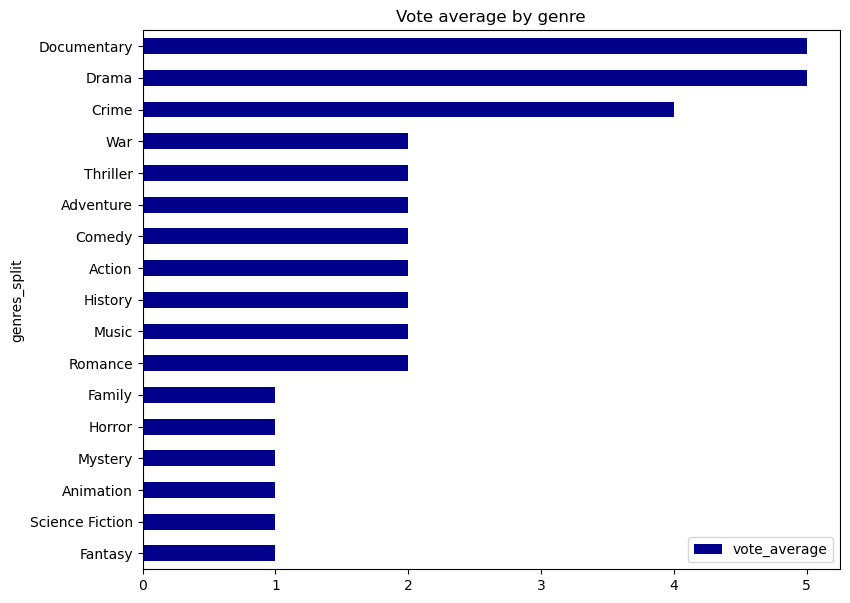

In [76]:
genres_vote[['vote_average']].plot.barh(title = 'Vote average by genre', color=('darkblue'), figsize = (9,7))
plt.show()

# Research Hypotheses (H):

## 1. The best movies according to vote avg. return high profit and revenue.



In [77]:
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit']]

In [78]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.99,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50,1363528810
1,28.42,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.10,228436354
2,13.11,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.30,185238201
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.50,1868178225
4,9.34,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.30,1316249360


In [79]:
# FIRST LET'S CONSIDER ONLY MOVIES WHERE VOTE COUNT > 50 
movies_counted = movies_genre[movies_genre['vote_count']>=50]

In [81]:
movies_corr = movies_counted.corr(method = 'spearman', numeric_only=True)
movies_corr

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.00,0.48,0.59,0.23,0.77,0.19,0.50
budget,0.48,1.00,0.71,0.36,0.55,-0.04,0.33
revenue,0.59,0.71,1.00,0.34,0.68,0.11,0.84
runtime,0.23,0.36,0.34,1.00,0.26,0.29,0.21
vote_count,0.77,0.55,0.68,0.26,1.00,0.29,0.58
vote_average,0.19,-0.04,0.11,0.29,0.29,1.00,0.20
profit,0.50,0.33,0.84,0.21,0.58,0.20,1.00


Text(0.5, 1.0, 'Heatmap of correlation between movie features')

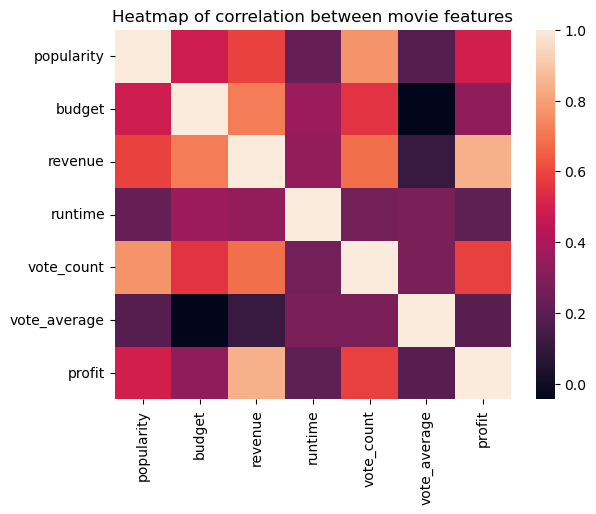

In [83]:
sns.heatmap(movies_corr)
plt.title('Heatmap of correlation between movie features')

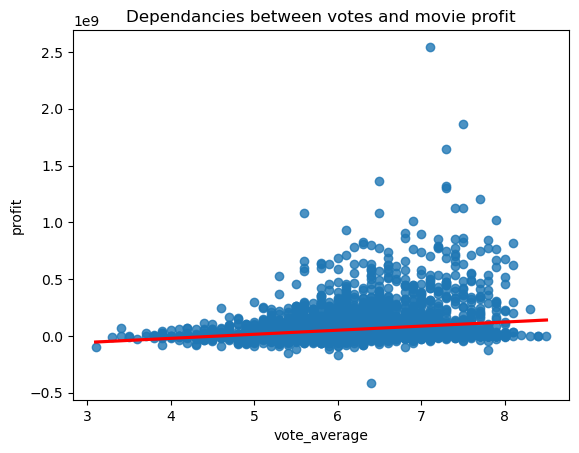

In [85]:
sns.regplot(data = movies_counted, x = 'vote_average', y = 'profit', line_kws = {'color':'red'})
plt.title('Dependancies between votes and movie profit')
plt.show()

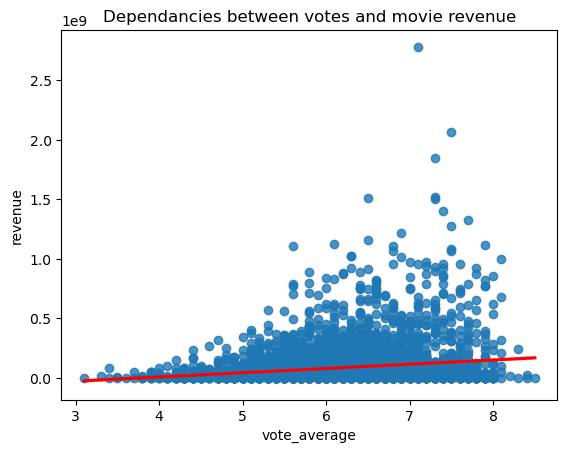

In [86]:
sns.regplot(data = movies_counted, x = 'vote_average', y = 'revenue', line_kws = {'color':'red'})
plt.title('Dependancies between votes and movie revenue')
plt.show()


## 2. The best movies according to popularity return high profit and revenue.



In [87]:
movies_counted.corr(method = 'spearman', numeric_only=True)

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.00,0.48,0.59,0.23,0.77,0.19,0.50
budget,0.48,1.00,0.71,0.36,0.55,-0.04,0.33
revenue,0.59,0.71,1.00,0.34,0.68,0.11,0.84
runtime,0.23,0.36,0.34,1.00,0.26,0.29,0.21
vote_count,0.77,0.55,0.68,0.26,1.00,0.29,0.58
vote_average,0.19,-0.04,0.11,0.29,0.29,1.00,0.20
profit,0.50,0.33,0.84,0.21,0.58,0.20,1.00


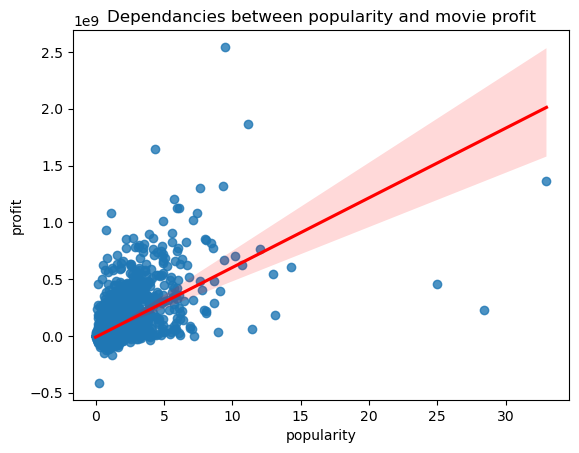

In [91]:
sns.regplot(data = movies_counted, x = 'popularity', y = 'profit', line_kws = {'color':'red'})
plt.title('Dependancies between popularity and movie profit')
plt.show()

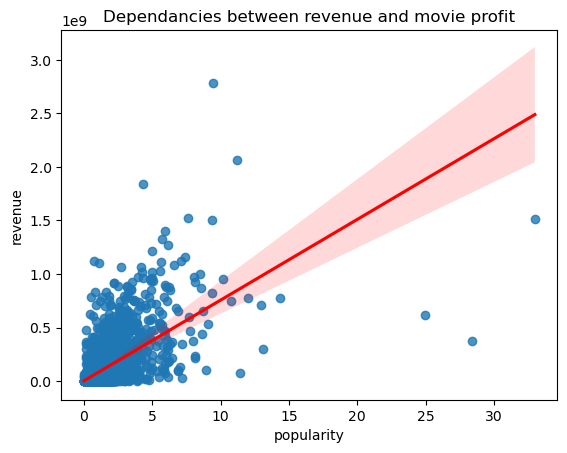

In [92]:
sns.regplot(data = movies_counted, x = 'popularity', y = 'revenue', line_kws = {'color':'red'})
plt.title('Dependancies between revenue and movie profit')
plt.show()


## 3. Highly budgeted movies return high revenue and profit.


In [93]:
movies_counted.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.99,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50,1363528810
1,28.42,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.10,228436354
2,13.11,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.30,185238201
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.50,1868178225
4,9.34,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.30,1316249360


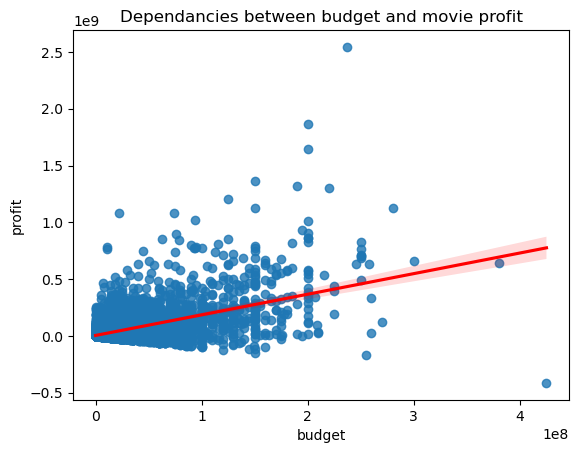

In [94]:
sns.regplot(data = movies_counted, x = 'budget', y = 'profit', line_kws = {'color':'red'})
plt.title('Dependancies between budget and movie profit')
plt.show()

## 4. Highly budgeted movies have a high popularity.

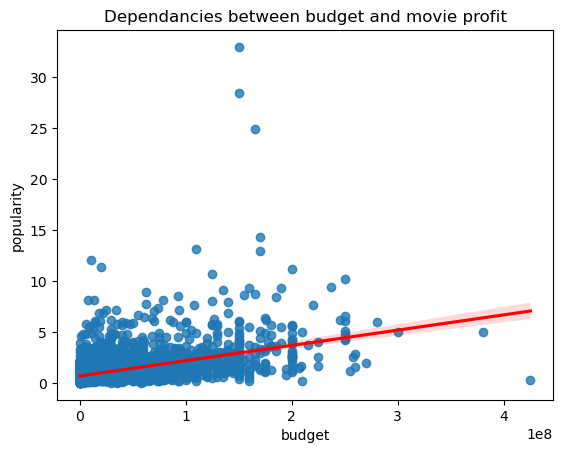

In [96]:
sns.regplot(data = movies_counted, x = 'budget', y = 'popularity', line_kws = {'color':'red'})
plt.title('Dependancies between budget and movie profit')
plt.show()

## 5. Take a look at a profit per genre per year

In [98]:

movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average', 'profit']]
split = movies_genre['genres'].str.split('|').apply(lambda x: pd.Series(x)).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
# DELETING ALL GENRES OLD COLUMN
del movies_genre['genres']
# ADDING A COLUMN (OUR SERIES) TO DF 
movies_genre = movies_genre.join(split)
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.99,150000000,1513528810,Jurassic World,124,2015,5562,6.50,1363528810,Action
0,32.99,150000000,1513528810,Jurassic World,124,2015,5562,6.50,1363528810,Adventure
0,32.99,150000000,1513528810,Jurassic World,124,2015,5562,6.50,1363528810,Science Fiction
0,32.99,150000000,1513528810,Jurassic World,124,2015,5562,6.50,1363528810,Thriller
1,28.42,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.10,228436354,Action


In [100]:
# grouping by year and genres
time_genre = pd.DataFrame(movies_genre.groupby(['release_year', 'genres_split'])['profit'].mean())
time_genre

profit
release_year genres_split               
1960         Action           6363125.00
             Adventure         431000.00
             Comedy           5258750.00
             Crime                  0.00
             Drama            8245619.38
...                                  ...
2015         Science Fiction 83321303.52
             TV Movie         -150000.00
             Thriller        32869106.85
             War             54677314.33
             Western         72856619.00

[1049 rows x 1 columns]

In [101]:
pd.pivot_table(time_genre, values = 'profit', index = 'genres_split', columns = 'release_year')

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genres_split,,,,,,,,,,,,,,,,,,,,,,,
Action,6363125.00,2457142.86,10437500.00,14999691.25,24280000.00,16104504.78,324785.71,21732786.43,8868478.83,5861449.30,7735913.45,...,32379154.19,38048623.21,45977444.05,47642764.40,57555510.74,34571030.36,51968078.25,71910257.42,47431725.63,69943650.02,90399046.75
Adventure,431000.00,39130002.33,21214285.71,9428395.00,24123400.00,25124276.33,791563.64,49281873.86,15122159.40,16651809.40,11406377.67,...,70756754.32,64895200.09,83916731.08,55016526.81,113364919.74,98125646.68,113343224.56,162549574.30,100638113.40,120373306.99,144787868.97
Animation,NaN,211880014.00,NaN,0.00,0.00,0.00,-105000.00,100921706.00,0.00,0.00,25837628.50,...,40307312.15,39047734.97,67147670.53,51907242.58,48862898.25,58455658.64,63420098.93,69231546.88,93718795.26,64313463.25,83691174.38
Comedy,5258750.00,22198001.40,1599974.80,765591.92,7080111.38,3264285.71,-149550.00,10135087.47,-1277777.78,-125000.00,11901488.58,...,22147617.44,24944308.17,30674848.55,21483012.43,24741982.81,23154807.88,27241358.72,25631999.14,25068455.09,26648786.86,33703819.07
Crime,0.00,18828411.00,3709948.67,369526.75,1723307.30,-22500.00,-275560.00,12899678.71,6762174.60,31482963.00,-2125000.00,...,15680793.69,21551432.96,16700048.40,31258696.85,11016642.31,13490412.32,25395271.62,29522925.56,23248589.51,5903014.23,61286524.37
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,...,316012.71,6772940.00,5229344.63,321262.23,-1603933.56,187417.77,2567196.82,1102306.59,321880.23,13104.14,531061.86
Drama,8245619.38,4912698.38,4373796.19,1587307.69,3726105.55,11933809.80,1014793.06,18045095.00,6354859.15,10317995.54,19753262.84,...,17180823.51,12994800.14,13953425.42,16736384.02,15209056.89,13510589.18,10830976.52,23418944.87,13344942.61,13697098.67,16315310.44
Family,3333333.33,42576002.80,4000000.00,-333333.33,37818181.75,51671428.67,-341828.57,64281204.00,-640000.00,0.00,17225085.67,...,51714774.93,35281751.28,80470561.73,44483026.14,62009322.10,98999767.49,65483435.47,69321493.02,89321956.44,56295182.74,85974520.75
Fantasy,-375000.00,0.00,-126.00,-500000.00,24068181.75,NaN,0.00,-3000000.00,-2000000.00,0.00,0.00,...,64388182.00,57967661.44,93461583.43,51441997.77,96235822.10,83235328.52,94486677.85,122245621.97,79363628.00,112966482.64,86576948.30


In [102]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = 'genres_split', columns = 'release_year)

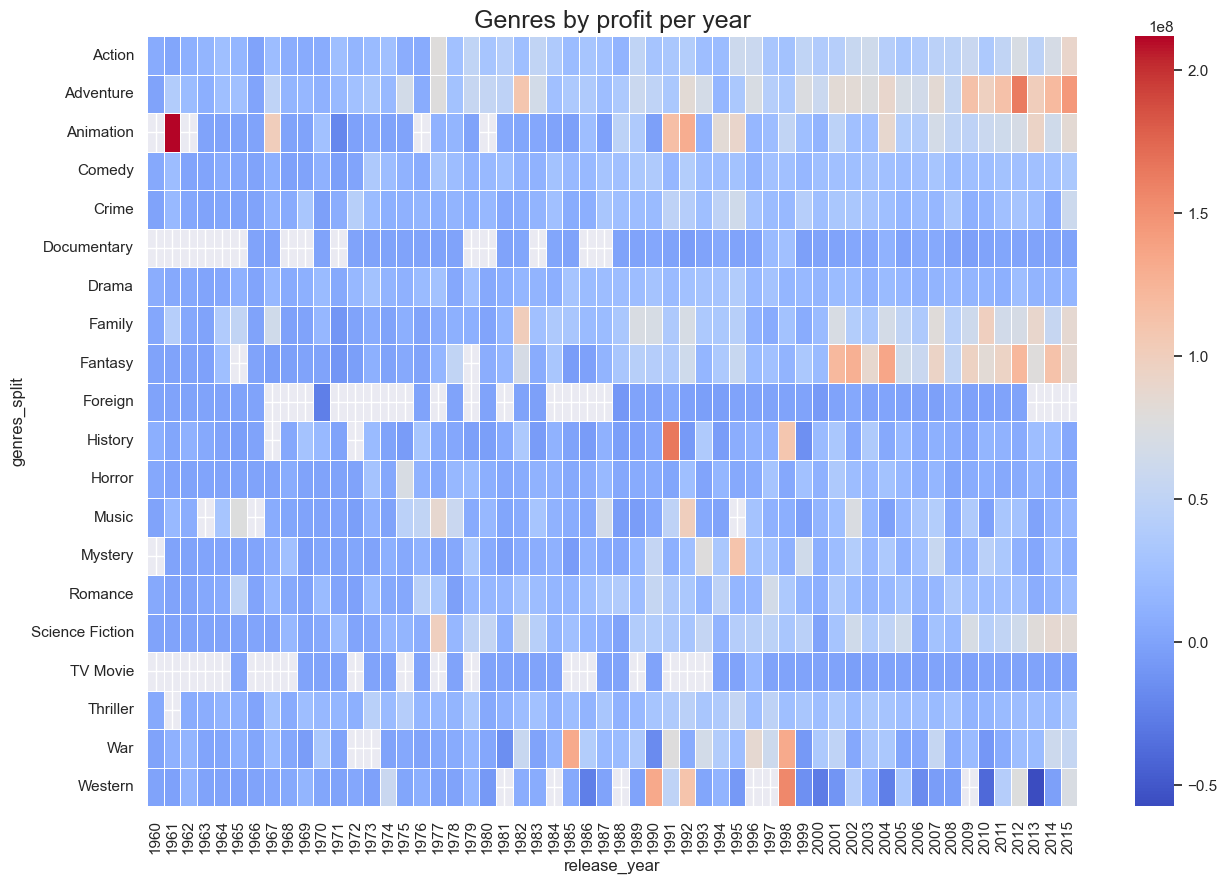

In [107]:
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(final_genre, cmap = 'coolwarm', linewidth = .5)
plt.title('Genres by profit per year', fontsize=18)
plt.show()